In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/beer_permits.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,ObjectId,Permit__,Status,Permit_Type,Permit_Sub_Type,Permit_Subtype_Description,Date_Entered,Date_Issued,Parcel,Business_Name,Business_Owner,Address,City,State,ZIP,Council_Dist,Census_Tract,Lon,Lat,geometry
0,1,21-27149,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Thu, 01 Apr 2021 05:00:00 GMT","Thu, 29 Jul 2021 05:00:00 GMT",10308006000,"LOLA NASHVILLE, LLC",None,4401 MURPHY RD,NASHVILLE,TN,37209.0,24,37013400,-86.839203,36.140724,POINT (-86.83920 36.14072)
1,2,21-27151,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,"Fri, 02 Apr 2021 05:00:00 GMT","Thu, 29 Jul 2021 05:00:00 GMT",07207029200,BITE A BIT THAI SUSHI,KEVIN SICHOUMPHONH,1402 MCGAVOCK PIKE,NASHVILLE,TN,37216.0,7,37011500,-86.723963,36.204799,POINT (-86.72396 36.20480)
2,3,21-27153,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Mon, 05 Apr 2021 05:00:00 GMT","Thu, 15 Sep 2022 05:00:00 GMT",13314008900,404 BAR & GRILL,Nancy McGrath,404 ELYSIAN FIELDS RD,NASHVILLE,TN,37211.0,26,37018901,-86.731159,36.086771,POINT (-86.73116 36.08677)
3,4,21-27157,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Fri, 09 Apr 2021 05:00:00 GMT","Thu, 10 Jun 2021 05:00:00 GMT",093130C80100CO,SUNDA NEW ASIAN,None,592 12TH AVE S,NASHVILLE,TN,37203.0,19,37019500,-86.784013,36.151893,POINT (-86.78401 36.15189)
4,5,21-27171,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Wed, 14 Apr 2021 05:00:00 GMT","Thu, 13 Jan 2022 06:00:00 GMT",09109003200,TEE LINE CURLING & BOWLING CENTER,None,106 DULUTH AVE,NASHVILLE,TN,37209.0,20,37013202,-86.867446,36.157813,POINT (-86.86745 36.15781)


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

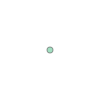

In [4]:
zipcodes.loc[0, 'geometry']

In [5]:
print(zipcodes.loc[0, 'geometry'])

POINT (-86.8392031 36.14072435)


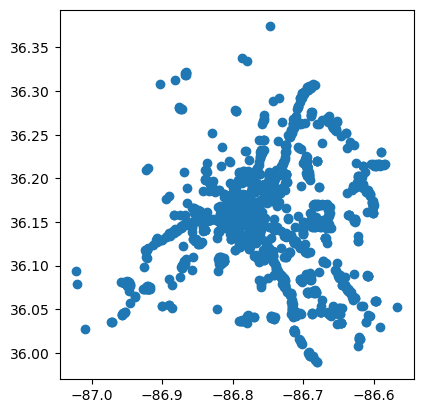

In [6]:
zipcodes.plot();

In [8]:
beer = pd.read_csv('../data/beer_clean.csv')
print(beer.shape)
beer.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '../data/beer_clean.csv'

In [ ]:
beer.info()

In [ ]:
zipcodes.crs

In [ ]:
beer_geo = gpd.GeoDataFrame(beer, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(beer.lng, beer.lat))

In [ ]:
type(beer_geo)

In [ ]:
zipcodes = zipcodes[['ZIP','City','geometry']]

In [ ]:
beer_zip = gpd.sjoin(beer_geo,zipcodes, predicate = 'within')

In [ ]:
beer_zip.head()

In [ ]:
beer_zip['ZIP'].value_counts()

In [ ]:
beer_37203 = beer_zip.loc[beer_zip['ZIP'] == '37203.0']
beer_37203.shape